# Proyecto Final Econometría II


**Por;**

Santiago Sánchez

José Angel Tovar

**Objetivo**

Pronosticar en la medida de lo posible los resultados de los siguietes equipos por jornada.

**Motivación**

El futbol es un deporte sumamente dificil de predecir, esto porque interfieren una serie de variables incontrolables en muchas de las ocasiones, es por esto, que nosotros como aficionados nos emociona y motiva el tratar de crear un modelo que pronostique resultados concretos mas aun de equipos de una liga tan competitiva como lo es la Premier League.

**Modelo general**

*Y(p:gane/pierda) = a + B1(local/visitante) + B2(Goal por partido) + B3(DF) + B4(Posición) + B6(Posición contrincante) + Error*

**4 modelos a evaluar**

Y = P(Manchester_City_gane_la_siguiente_jornada: Si/No)

Y = P(Liverpool_gane_la_siguiente_jornada: Si/No)

Y = P(Chelsea_gane_la_siguiente_jornada: Si/No)

Y = P(Tottenham_gane_la_siguiente_jornada: Si/No)

**Data set**

29 datos para cada variable x

In [58]:
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import statistics as stats
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
resultados_home = 'http://www.resultados-futbol.com/premier/grupo1/jornada{}'
headers = {'User-agent': 'Safari/13.1'}

In [5]:
equipos_info = {}
for page in range(1, 30):
    equipos_info[page] = {}
    url = resultados_home.format(page)
    html = requests.get(url, headers=headers)
    soup = BeautifulSoup(html.content, "lxml")
    table_2 = soup.find("table", {"id" : "tabla2"})
    tds = table_2.findAll("td")
    for i, td in enumerate(tds):
        try:
            clase = td['class'][0]
            if clase == 'equipo':
                equipo = td.get_text().strip()
                equipos_info[page][equipo] = []
                for ii in range(1, 30):
                    value = int(tds[i + ii].get_text())
                    equipos_info[page][equipo].append(value)
        except:
            pass
    print(page, end=' | ')

1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 

In [6]:
def create_dataframe_for_team(equipos_info, team):
    lista_jornadas = []
    lista_ptos = []
    lista_ganados = []
    lista_goles_favor = []
    lista_goles_contra = []
    lista_y = []
    for jornada, jornada_info in equipos_info.items():        
        equipo_info = jornada_info[team]
        ptos = equipo_info[0]
        ganados = equipo_info[2]
        goles_favor = equipo_info[5]
        goles_contra = equipo_info[6]        
        lista_jornadas.append(jornada)
        lista_ptos.append(ptos)
        lista_ganados.append(ganados)
        lista_goles_favor.append(goles_favor)
        lista_goles_contra.append(goles_contra)
    
    df = pd.DataFrame({'jornada': lista_jornadas,
                       'ptos': lista_ptos,
                       'ganados': lista_ganados,
                       'goles_favor': lista_goles_favor,
                       'goles_contra': lista_goles_contra})
    
    for i in range(len(df)):
        try:
            if df['ganados'][i] == df['ganados'][i-1]:
                lista_y.append(0) 
            else:
                lista_y.append(1)
        except:
            lista_y.append(np.nan)
    df['y'] = lista_y
    df = df.dropna()
    df = df.reset_index(drop=True)
    df['y'] = df['y'].astype(int)
    return df

In [150]:
chelsea_df = create_dataframe_for_team(equipos_info, 'Chelsea')
liverpool_df = create_dataframe_for_team(equipos_info, 'Liverpool')
man_city_df = create_dataframe_for_team(equipos_info, 'Man. City')
tottenham_df = create_dataframe_for_team(equipos_info, 'Tottenham')

In [224]:
liverpool_df_final=pd.read_excel(r"/Users/josetovar/Desktop/Python docs/proyecto final econometría/liverpool.xlsx")
chelsea_df_final=pd.read_excel(r"/Users/josetovar/Desktop/Python docs/proyecto final econometría/chelsea.xlsx")
tottenham_df_final=pd.read_excel(r"/Users/josetovar/Desktop/Python docs/proyecto final econometría/tottenham.xlsx")

In [152]:
man_city_df.to_excel(r'/Users/josetovar/Desktop/Python docs/proyecto final econometría/man_city.xlsx', index = False)

# Liverpool

In [206]:
liverpool_df_final

,jornada,y,goles_for,goles_against,dif_goles,c_v,pos,posc
0,2,1,2,1,1,0,3,17
1,3,1,3,1,2,1,1,2
2,4,1,3,0,3,0,1,6
3,5,1,3,1,2,1,1,14
4,6,1,2,1,1,0,1,6
5,7,1,1,0,1,0,1,10
6,8,1,2,1,1,1,1,3
7,9,0,1,1,0,0,1,12
8,10,1,2,1,1,1,1,7
9,11,1,2,1,1,0,1,15


# Estadísticas descriptivas 

In [207]:
liverpool_df_final.describe()

,jornada,y,goles_for,goles_against,dif_goles,c_v,pos,posc
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,15.500000,0.928571,2.214286,0.714286,1.500000,0.500000,1.071429,10.714286
std,8.225975,0.262265,1.066567,0.762896,1.319371,0.509175,0.377964,5.949523
min,2.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,1.000000,2.000000
25%,8.750000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,6.000000
50%,15.500000,1.000000,2.000000,1.000000,1.000000,0.500000,1.000000,11.000000
75%,22.250000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,15.500000
max,29.000000,1.000000,5.000000,3.000000,4.000000,1.000000,3.000000,20.000000


In [208]:
liverpool_df_final.var()

jornada          67.666667
y                 0.068783
goles_for         1.137566
goles_against     0.582011
dif_goles         1.740741
c_v               0.259259
pos               0.142857
posc             35.396825
dtype: float64

In [245]:
liverpool_df_final.corr()

,jornada,y,goles_for,goles_against,dif_goles,c_v,pos,posc
jornada,1.000000,-0.103005,-0.139307,0.023607,-0.126265,0.106112,-0.321634,0.284547
y,-0.103005,1.000000,0.453963,-0.475997,0.642214,0.277350,0.053376,-0.227190
goles_for,-0.139307,0.453963,1.000000,-0.013005,0.815911,0.340997,-0.039375,-0.153421
goles_against,0.023607,-0.475997,-0.013005,1.000000,-0.588740,0.095346,0.073398,0.315907
dif_goles,-0.126265,0.642214,0.815911,-0.588740,1.000000,0.220527,-0.074271,-0.306691
c_v,0.106112,0.277350,0.340997,0.095346,0.220527,1.000000,-0.192450,-0.122261
pos,-0.321634,0.053376,-0.039375,0.073398,-0.074271,-0.192450,1.000000,0.207056
posc,0.284547,-0.227190,-0.153421,0.315907,-0.306691,-0.122261,0.207056,1.000000


# Gráficos

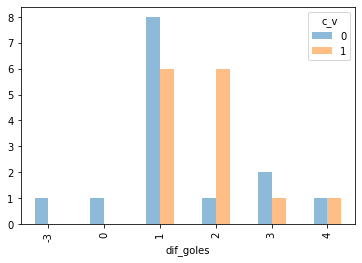

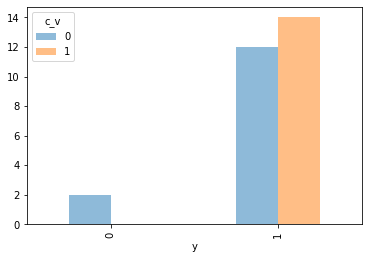

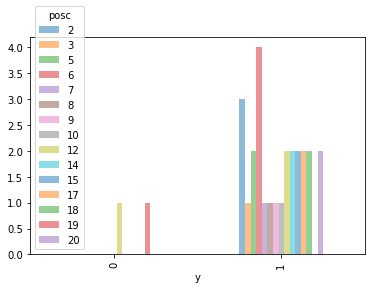

In [252]:
pd.crosstab(liverpool_df_final.dif_goles,liverpool_df_final.c_v).plot(kind = 'bar', alpha =0.5)
# Liverpool solo tuvo diferencia de goles negativa cuando jugó de visita 
pd.crosstab(liverpool_df_final.y,liverpool_df_final.c_v).plot(kind = 'bar', alpha =0.5)
# Liverpool nunca perdió en casa 
pd.crosstab(liverpool_df_final.y,liverpool_df_final.posc).plot(kind = 'bar', alpha =0.5)

# Chelsea

In [225]:
chelsea_df_final

,jornada,y,goles_for,goles_against,dif_goles,c_v,pos,posc
0,2,0,1,1,0,1,19,12
1,3,1,3,2,1,0,15,11
2,4,0,2,2,0,1,14,9
3,5,1,5,2,3,0,11,17
4,6,0,1,2,-1,1,6,1
5,7,1,2,0,2,1,11,15
6,8,1,4,1,3,0,7,14
7,9,1,1,0,1,1,5,16
8,10,1,4,2,2,0,4,8
9,11,1,2,1,1,0,4,20


# Estdísticas descriptivas

In [228]:
chelsea_df_final.describe()

,jornada,y,goles_for,goles_against,dif_goles,c_v,pos,posc
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,15.500000,0.500000,1.821429,1.250000,0.571429,0.535714,5.964286,11.714286
std,8.225975,0.509175,1.334821,0.844371,1.642685,0.507875,4.086855,5.017430
min,2.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,3.000000,1.000000
25%,8.750000,0.000000,1.000000,1.000000,-1.000000,0.000000,4.000000,8.750000
50%,15.500000,0.500000,2.000000,1.000000,0.500000,1.000000,4.000000,12.500000
75%,22.250000,1.000000,2.000000,2.000000,2.000000,1.000000,5.250000,15.250000
max,29.000000,1.000000,5.000000,3.000000,4.000000,1.000000,19.000000,20.000000


In [227]:
chelsea_df_final.var()

jornada          67.666667
y                 0.259259
goles_for         1.781746
goles_against     0.712963
dif_goles         2.698413
c_v               0.257937
pos              16.702381
posc             25.174603
dtype: float64

In [246]:
chelsea_df_final.corr()

,jornada,y,goles_for,goles_against,dif_goles,c_v,pos,posc
jornada,1.000000,-0.185695,-0.180459,-0.055989,-0.117859,0.004433,-0.697921,-0.105889
y,-0.185695,1.000000,0.681171,-0.559950,0.841334,-0.071611,0.026698,0.115979
goles_for,-0.180459,0.681171,1.000000,-0.090368,0.859035,-0.290727,0.209256,-0.007900
goles_against,-0.055989,-0.559950,-0.090368,1.000000,-0.587450,-0.323875,0.077813,-0.122391
dif_goles,-0.117859,0.841334,0.859035,-0.587450,1.000000,-0.069762,0.130041,0.056492
c_v,0.004433,-0.071611,-0.290727,-0.323875,-0.069762,1.000000,0.098779,-0.024916
pos,-0.697921,0.026698,0.209256,0.077813,0.130041,0.098779,1.000000,0.048251
posc,-0.105889,0.115979,-0.007900,-0.122391,0.056492,-0.024916,0.048251,1.000000


# Gráficos

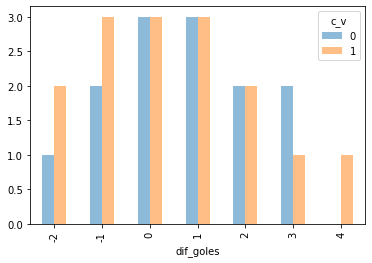

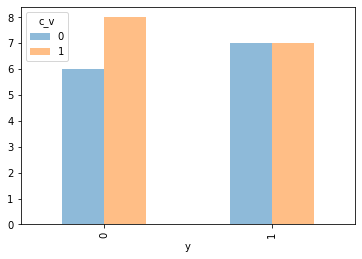

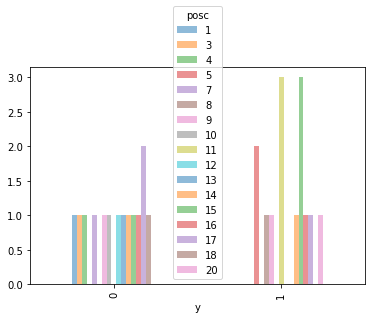

In [251]:
pd.crosstab(chelsea_df_final.dif_goles,chelsea_df_final.c_v).plot(kind = 'bar', alpha =0.5)
# 0, 1 son los más frecuentes 
pd.crosstab(chelsea_df_final.y,chelsea_df_final.c_v).plot(kind = 'bar', alpha =0.5)
# Chelsea perdió mas veces en casa
pd.crosstab(chelsea_df_final.y,chelsea_df_final.posc).plot(kind = 'bar', alpha =0.5)
# Ganó 3 veces a la posición 11 y 15

# Tottenham 

In [241]:
tottenham_df_final

,jornada,y,goles_favor,goles_contra,dif_goles,c_v,pos,posc
0,2,0,2,2,0,0,6,1
1,3,0,0,1,-1,1,6,18
2,4,0,2,2,0,0,7,3
3,5,1,4,0,4,1,9,4
4,6,0,1,2,-1,0,3,5
5,7,1,2,1,1,1,7,13
6,8,0,0,3,-3,0,6,16
7,9,0,1,1,0,1,9,20
8,10,0,1,2,-1,0,7,1
9,11,0,1,1,0,0,11,16


# Estadísticas descriptivas

In [242]:
tottenham_df_final.describe()

,jornada,y,goles_favor,goles_contra,dif_goles,c_v,pos,posc
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,15.500000,0.357143,1.571429,1.392857,0.178571,0.464286,7.178571,10.250000
std,8.225975,0.487950,1.259882,0.831745,1.634208,0.507875,2.277971,6.507119
min,2.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,3.000000,1.000000
25%,8.750000,0.000000,1.000000,1.000000,-1.000000,0.000000,6.000000,4.000000
50%,15.500000,0.000000,1.500000,1.000000,0.000000,0.000000,7.000000,10.000000
75%,22.250000,1.000000,2.000000,2.000000,1.000000,1.000000,8.000000,16.000000
max,29.000000,1.000000,5.000000,3.000000,5.000000,1.000000,14.000000,20.000000


In [243]:
tottenham_df_final.var()

jornada         67.666667
y                0.238095
goles_favor      1.587302
goles_contra     0.691799
dif_goles        2.670635
c_v              0.257937
pos              5.189153
posc            42.342593
dtype: float64

In [248]:
tottenham_df_final.corr()

,jornada,y,goles_favor,goles_contra,dif_goles,c_v,pos,posc
jornada,1.000000,0.101500,-0.042885,-0.067666,0.001378,0.004433,-0.170969,0.089605
y,0.101500,1.000000,0.740170,-0.358514,0.753098,0.352282,0.307025,0.134144
goles_favor,-0.042885,0.740170,1.000000,-0.186819,0.866026,0.206725,0.324469,-0.004518
goles_contra,-0.067666,-0.358514,-0.186819,1.000000,-0.652985,-0.360105,-0.253423,-0.059878
dif_goles,0.001378,0.753098,0.866026,-0.652985,1.000000,0.342652,0.379129,0.026992
c_v,0.004433,0.352282,0.206725,-0.360105,0.342652,1.000000,0.149777,-0.014009
pos,-0.170969,0.307025,0.324469,-0.253423,0.379129,0.149777,1.000000,0.274223
posc,0.089605,0.134144,-0.004518,-0.059878,0.026992,-0.014009,0.274223,1.000000


# Gráficas 

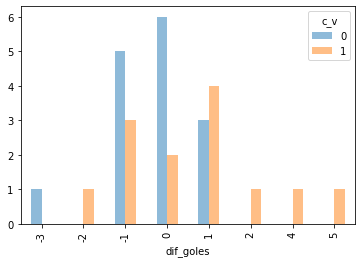

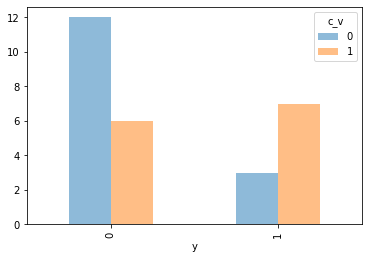

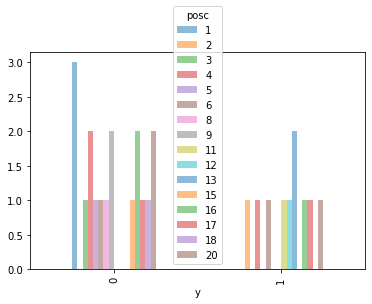

In [250]:
pd.crosstab(tottenham_df_final.dif_goles,tottenham_df_final.c_v).plot(kind = 'bar', alpha =0.5)
# De visita únicamente ganó 3 veces 
pd.crosstab(tottenham_df_final.y,tottenham_df_final.c_v).plot(kind = 'bar', alpha =0.5)
# Perdió o empató 12 veces de visita 
pd.crosstab(tottenham_df_final.y,tottenham_df_final.posc).plot(kind = 'bar', alpha =0.5)
